In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# read dataset from hard drive
file_path = '../dataset/SeoulBikeData.csv'
df = pd.read_csv(file_path, encoding='Windows-1252')

In [5]:
# print head of dataset
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [7]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# missing values check
missing_values = df.isnull().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


**Observation**
- No missing values in dataset

In [12]:
# conversion of data to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# new columns day, month, year columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
print('Scope of dates: ',df['Date'].min(),' - ',df['Date'].max())

Scope of dates:  2017-12-01 00:00:00  -  2018-11-30 00:00:00


**Observations**
- Dataset contains data of one whole year
- Dataset starts on 1st December 2017

In [17]:
# categorical data encoding
label_encoder = LabelEncoder()
df['Seasons_label'] = label_encoder.fit_transform(df['Seasons'])
df['Holiday_label'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day_label'] = label_encoder.fit_transform(df['Functioning Day'])

In [19]:
# reorder of df's column
df = df[['Date', 'Year', 'Month', 'Day', 'Hour',
         'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
         'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
         'Seasons', 'Seasons_label', 'Holiday', 'Holiday_label', 'Functioning Day', 'Functioning Day_label', 'Rented Bike Count']]

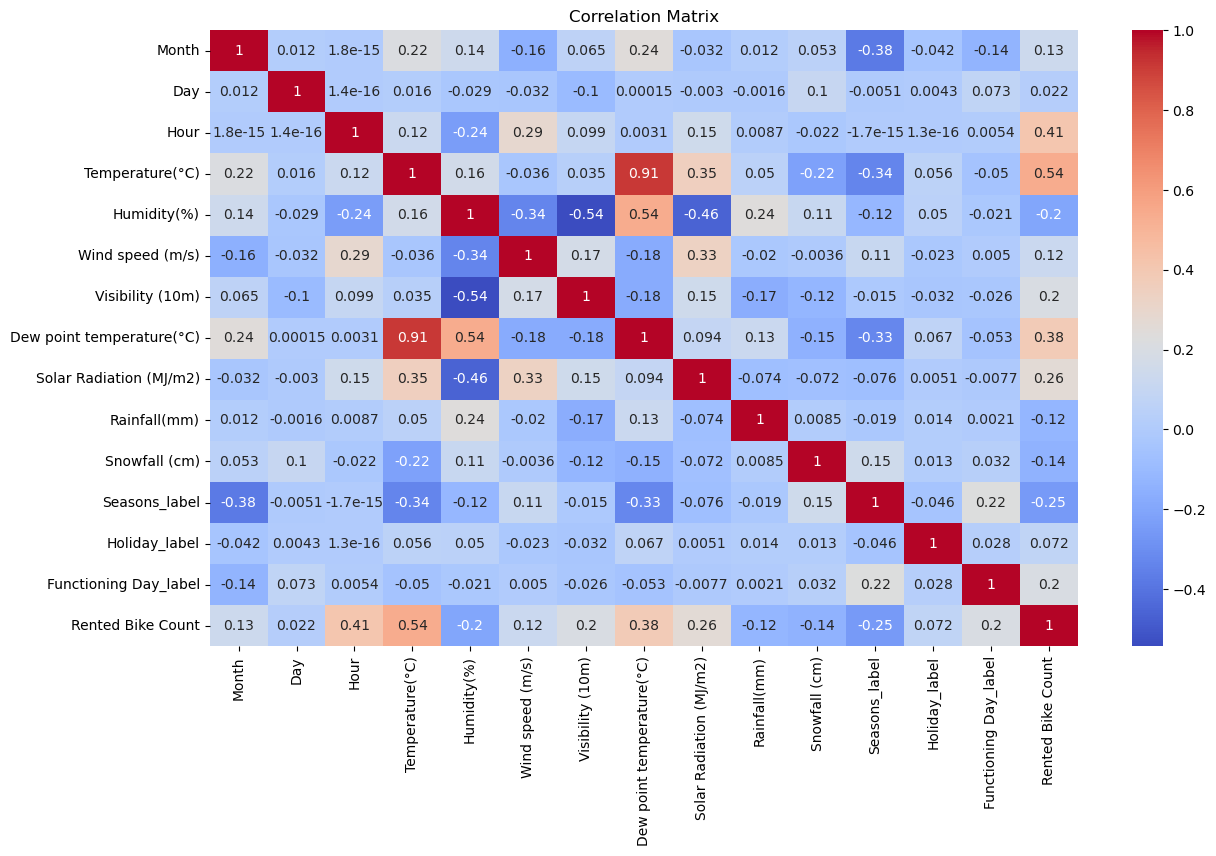

In [21]:
# Correlation matrix
df_limited = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Year'])

correlation_matrix = df_limited.corr()

# Correlation plot
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [48]:
# change of matrix shape
corr_pairs = correlation_matrix.unstack()

# matrix sorting and filtering
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort")
strongest_corr = sorted_corr_pairs[(sorted_corr_pairs != 1)].drop_duplicates()
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.3f}'.format  

print(strongest_corr)

Visibility (10m)           Humidity(%)                 -0.543
Humidity(%)                Solar Radiation (MJ/m2)     -0.462
Month                      Seasons_label               -0.377
Humidity(%)                Wind speed (m/s)            -0.337
Seasons_label              Temperature(°C)             -0.335
                           Dew point temperature(°C)   -0.329
Rented Bike Count          Seasons_label               -0.253
Humidity(%)                Hour                        -0.242
Temperature(°C)            Snowfall (cm)               -0.218
Humidity(%)                Rented Bike Count           -0.200
Visibility (10m)           Dew point temperature(°C)   -0.177
Wind speed (m/s)           Dew point temperature(°C)   -0.176
Visibility (10m)           Rainfall(mm)                -0.168
Month                      Wind speed (m/s)            -0.157
Dew point temperature(°C)  Snowfall (cm)               -0.151
Rented Bike Count          Snowfall (cm)               -0.142
Month   

**Observations**
strong correlation between features:
- Temperature(°C)  -  Dew point temperature(°C)  =  0.913
- Humidity(%)  -  Dew point temperature(°C)  =  0.537
- Visibility (10m)  -  Humidity(%)  =  -0.543
- Humidity(%)  -  Solar Radiation (MJ/m2)  =  -0.462

In [67]:
# correlation against target_column
corr_with_target = df_limited.corr()['Rented Bike Count'].drop('Rented Bike Count')

# features sorting
sorted_corr = corr_with_target.sort_values(ascending=False)

print(sorted_corr)

Temperature(°C)              0.539
Hour                         0.410
Dew point temperature(°C)    0.380
Solar Radiation (MJ/m2)      0.262
Functioning Day_label        0.204
Visibility (10m)             0.199
Month                        0.134
Wind speed (m/s)             0.121
Holiday_label                0.072
Day                          0.022
Rainfall(mm)                -0.123
Snowfall (cm)               -0.142
Humidity(%)                 -0.200
Seasons_label               -0.253
Name: Rented Bike Count, dtype: float64


**Observation**
- It seems there are relevant features with positive and negative correlation with target column

In [83]:
abs_corr_with_target = abs(corr_with_target)
sorted_corr = abs_corr_with_target.sort_values(ascending=False)
print(sorted_corr)

Temperature(°C)             0.539
Hour                        0.410
Dew point temperature(°C)   0.380
Solar Radiation (MJ/m2)     0.262
Seasons_label               0.253
Functioning Day_label       0.204
Humidity(%)                 0.200
Visibility (10m)            0.199
Snowfall (cm)               0.142
Month                       0.134
Rainfall(mm)                0.123
Wind speed (m/s)            0.121
Holiday_label               0.072
Day                         0.022
Name: Rented Bike Count, dtype: float64


**Observation**
- We can select top rated features but in my opinion Dev point temperature should be ommited due to the strong correlation with Temperature

In [88]:
# sample data (first record)
print(df.iloc[0])

Date                         2017-12-01 00:00:00
Year                                        2017
Month                                         12
Day                                            1
Hour                                           0
Temperature(°C)                           -5.200
Humidity(%)                                   37
Wind speed (m/s)                           2.200
Visibility (10m)                            2000
Dew point temperature(°C)                -17.600
Solar Radiation (MJ/m2)                    0.000
Rainfall(mm)                               0.000
Snowfall (cm)                              0.000
Seasons                                   Winter
Seasons_label                                  3
Holiday                               No Holiday
Holiday_label                                  1
Functioning Day                              Yes
Functioning Day_label                          1
Rented Bike Count                            254
Name: 0, dtype: obje

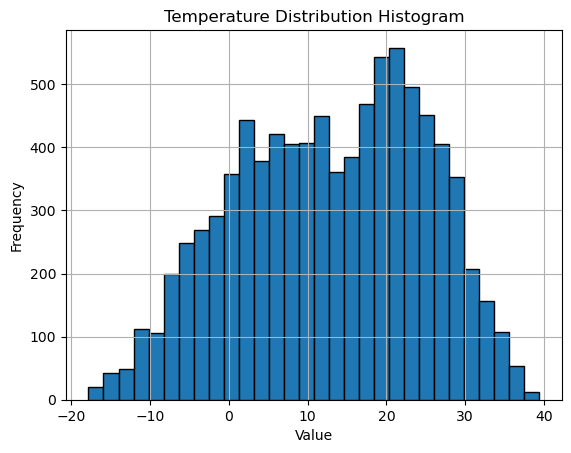

In [104]:
# Temperature Distribution
df['Temperature(°C)'].hist(bins=30, edgecolor='black')
plt.title('Temperature Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [90]:
# statistics of column's data
column_stats = df['Temperature(°C)'].describe()
print(column_stats)

count   8760.000
mean      12.883
std       11.945
min      -17.800
25%        3.500
50%       13.700
75%       22.500
max       39.400
Name: Temperature(°C), dtype: float64


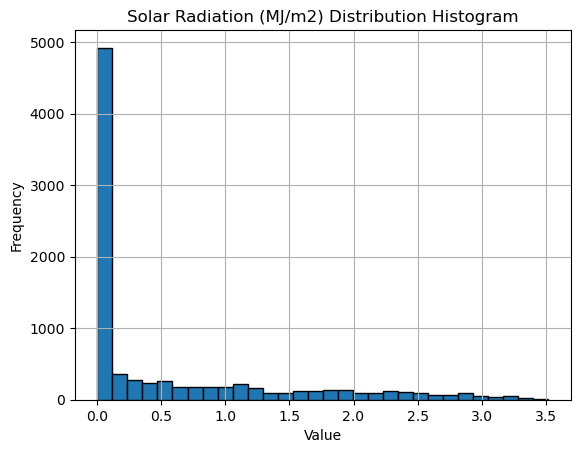

In [106]:
# Solar Radiation Distribution
df['Solar Radiation (MJ/m2)'].hist(bins=30, edgecolor='black')
plt.title('Solar Radiation (MJ/m2) Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

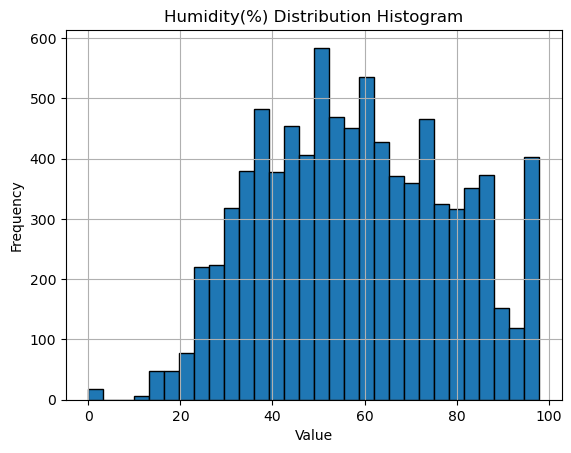

In [108]:
# Humidity Distribution
df['Humidity(%)'].hist(bins=30, edgecolor='black')
plt.title('Humidity(%) Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

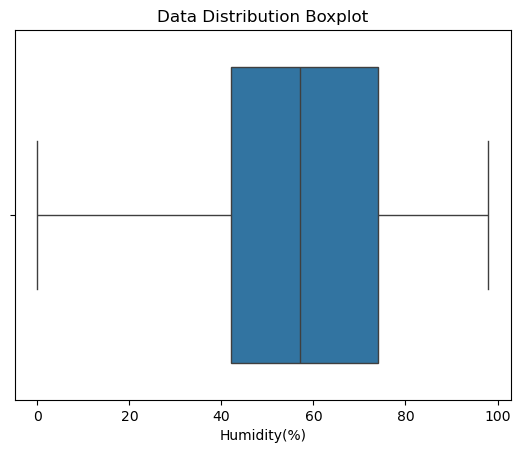

In [110]:
# Boxplot for the selected column
sns.boxplot(x=df['Humidity(%)'])
plt.title('Data Distribution Boxplot')
plt.show()

**Observation**
- No outlier observations

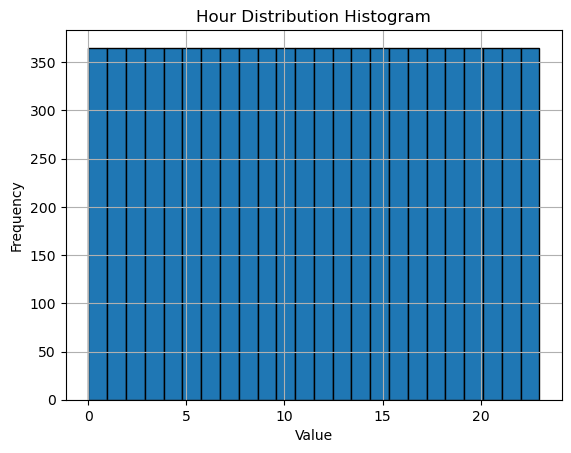

In [96]:
# Data Distribution
df['Hour'].hist(bins=24, edgecolor='black')
plt.title('Hour Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

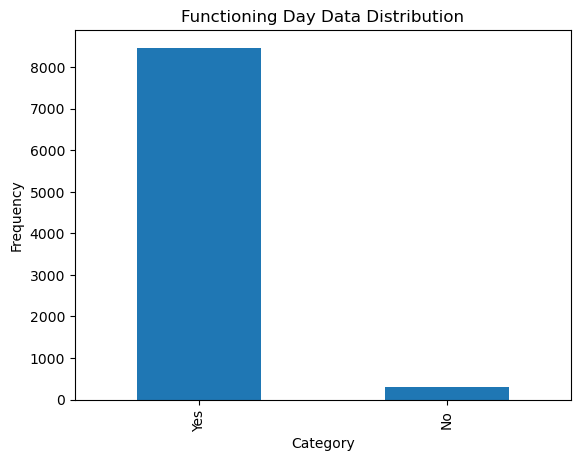

In [98]:
df['Functioning Day'].value_counts().plot(kind='bar')
plt.title('Functioning Day Data Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

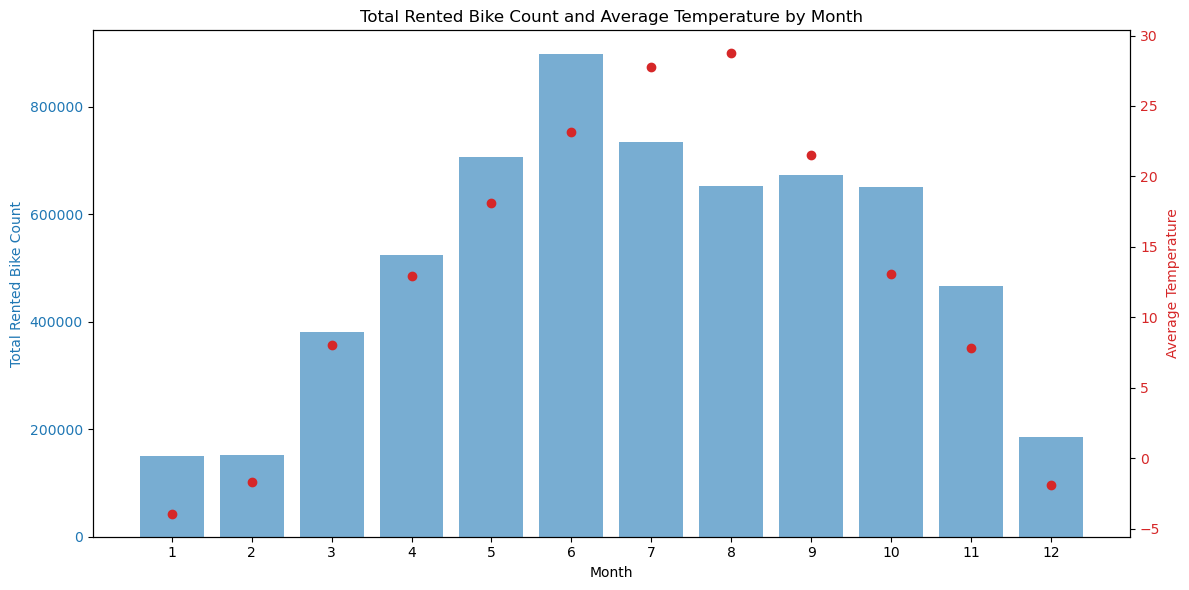

In [113]:
# data aggregation by month
monthly_data = df.groupby('Month').agg({
    'Rented Bike Count': 'sum',
    'Temperature(°C)': 'mean'
}).reset_index()

# draw a plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# barplot for Rented Bike Count
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Rented Bike Count', color=color)
ax1.bar(monthly_data['Month'].astype(str), monthly_data['Rented Bike Count'], color=color, alpha=0.6, label='Total Rented Bike Count')
ax1.tick_params(axis='y', labelcolor=color)

# second Y axis for mean temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Temperature', color=color)
ax2.plot(monthly_data['Month'].astype(str), monthly_data['Temperature(°C)'], linestyle='None', color=color, marker='o', label='Average Temperature')
ax2.tick_params(axis='y', labelcolor=color)

# title and legend
plt.title('Total Rented Bike Count and Average Temperature by Month')
fig.tight_layout()
plt.show()